In [1]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import os
import csv


In [64]:
# define variables, lists
# years of data for analysis
year_list = ['2015', '2016', '2017', '2018', '2019', '2022']

# project happiness survey categories
categories = ['Happiness Score', 'Family', 'Health', 'Freedom', 'Perceptions of Corruption', 'Generosity']

## assumption - complete happiness is an overall score of 10 with 1/5 or 2 points being the ideal for each category

In [53]:
# Load csv files containing the data from the Happiness Surveys for the years 2015 through 2019 and 2022
clean_data_df = pd.read_csv('Output_data/Happiness_df.csv')

clean_data_df

,Index,Country,Rank (2015),Happiness Score (2015),Family (2015),Health (2015),Freedom (2015),Perceptions of Corruption (2015),Generosity (2015),Rank (2016),...,Freedom (2019),Perceptions of Corruption (2019),Generosity (2019),Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022)
0,0,Switzerland,1.0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.572,0.343,0.263,4.0,7.512,1.226,0.822,0.677,0.461,0.147
1,1,Iceland,2.0,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.591,0.118,0.354,3.0,7.557,1.320,0.803,0.718,0.191,0.270
2,2,Denmark,3.0,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.592,0.410,0.252,2.0,7.636,1.243,0.777,0.719,0.532,0.188
3,3,Norway,4.0,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.603,0.341,0.271,8.0,7.365,1.239,0.786,0.728,0.474,0.217
4,4,Canada,5.0,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.584,0.308,0.285,15.0,7.025,1.188,0.783,0.659,0.368,0.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,132,Ivory Coast,151.0,3.655,0.77115,0.15185,0.46866,0.17922,0.20165,139.0,...,0.352,0.090,0.154,88.0,5.235,0.442,0.322,0.451,0.124,0.149
112,133,Burkina Faso,152.0,3.587,0.85188,0.27125,0.39493,0.12832,0.21747,145.0,...,0.255,0.113,0.177,113.0,4.670,0.565,0.320,0.382,0.126,0.186
113,134,Afghanistan,153.0,3.575,0.30285,0.30335,0.23414,0.09719,0.36510,154.0,...,0.000,0.025,0.158,146.0,2.404,0.000,0.289,0.000,0.005,0.089
114,136,Benin,155.0,3.340,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,...,0.349,0.082,0.175,115.0,4.623,0.064,0.335,0.479,0.230,0.127


In [54]:
# confirm lack of NaN values
clean_data_df.isnull().values.any()

False

In [77]:
# Select Health data
health_data_df = pd.DataFrame(clean_data_df[['Country',
                                            'Health (2015)',
                                            'Health (2016)',
                                            'Health (2017)',
                                            'Health (2018)',
                                            'Health (2019)',
                                            'Health (2022)'
                                            ]])
#country_data_df = country_data_df.rename(columns={'Country.1':'Country'})
health_data_df

,Country,Health (2015),Health (2016),Health (2017),Health (2018),Health (2019),Health (2022)
0,Switzerland,0.94143,0.86303,0.858131,0.927,1.052,0.822
1,Iceland,0.94784,0.86733,0.833552,0.914,1.026,0.803
2,Denmark,0.87464,0.79504,0.792566,0.868,0.996,0.777
3,Norway,0.88521,0.79579,0.796667,0.861,1.028,0.786
4,Canada,0.90563,0.82760,0.834558,0.896,1.039,0.783
...,...,...,...,...,...,...,...
111,Ivory Coast,0.15185,0.04476,0.048642,0.080,0.232,0.322
112,Burkina Faso,0.27125,0.21297,0.215844,0.254,0.380,0.320
113,Afghanistan,0.30335,0.17344,0.180747,0.255,0.361,0.289
114,Benin,0.31910,0.21028,0.209930,0.240,0.397,0.335


In [78]:
# Select country and corresponsing Health columns for the years
happy_data_df = pd.DataFrame(clean_data_df[['Country',
                                            'Happiness Score (2015)',
                                            'Happiness Score (2016)',
                                            'Happiness Score (2017)',
                                            'Happiness Score (2018)',
                                            'Happiness Score (2019)',
                                            'Happiness Score (2022)',
                                             ]])

# display only the columns pertaining to health
happy_data_df

,Country,Happiness Score (2015),Happiness Score (2016),Happiness Score (2017),Happiness Score (2018),Happiness Score (2019),Happiness Score (2022)
0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.512
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.557
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.636
3,Norway,7.522,7.498,7.537,7.594,7.554,7.365
4,Canada,7.427,7.404,7.316,7.328,7.278,7.025
...,...,...,...,...,...,...,...
111,Ivory Coast,3.655,3.916,4.180,4.671,4.944,5.235
112,Burkina Faso,3.587,3.739,4.032,4.424,4.587,4.670
113,Afghanistan,3.575,3.360,3.794,3.632,3.203,2.404
114,Benin,3.340,3.484,3.657,4.141,4.883,4.623


In [79]:
agg = health_data_df.agg(['mean','median','var','std','sem'])
agg

,Health (2015),Health (2016),Health (2017),Health (2018),Health (2019),Health (2022)
mean,0.678103,0.594167,0.596489,0.645276,0.777431,0.612310
median,0.724790,0.637425,0.637565,0.684500,0.815000,0.637500
var,0.047848,0.047045,0.045795,0.050751,0.044910,0.024276
std,0.218742,0.216898,0.213997,0.225281,0.211920,0.155807
sem,0.020310,0.020138,0.019869,0.020917,0.019676,0.014466


In [80]:
agg = happy_data_df.agg(['mean','median','var','std','sem'])
agg

,Happiness Score (2015),Happiness Score (2016),Happiness Score (2017),Happiness Score (2018),Happiness Score (2019),Happiness Score (2022)
mean,5.514328,5.525414,5.541164,5.576888,5.613086,5.667784
median,5.414000,5.499000,5.412500,5.572000,5.650500,5.804500
var,1.290902,1.227134,1.117121,1.072613,1.080080,1.171341
std,1.136179,1.107761,1.056940,1.035670,1.039269,1.082285
sem,0.105492,0.102853,0.098134,0.096160,0.096494,0.100488


In [ ]:
dfg = df.groupby(['name']).size().to_frame().sort_values([0], ascending = False).head(5).reset_index()

In [89]:
# Top/Bottom Health Score by Country 2015
loop_category = categories[2] # Health Happiness Score
i = 0 # 2015 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
health_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
#health_df_sorted.head(10), f'{test_year} HAPPY ↑',' -' * 30, f'{test_year} SAD ↓', health_df_sorted.tail(10)
bar2015 = health_df_sorted.groupby(['Country']).size().to_frame().sort_values([0], ascending = False).head(10).reset_index()
bar2015.columns = ['Country', f'{col}']
# create bar chart without the x axis tick marks
bar2015.plot(kind='bar',
                     color='teal',
                     legend=None,
                     title= (f'{loop_category} Happiness Scores for {test_year}')
                     )
# simply analyzing the shape of the graph, don't need country name just yet
#plt.tick_params(axis='x', labelsize=2, length = 8)
plt.title(f'{loop_category} vs Overall Happiness Scores for {test_year}', fontsize=18, weight='bold')           
plt.xlabel(f'['Country']', fontsize=14, weight='bold')
plt.ylabel(f'{col} score', fontsize=14, weight='bold')
plt.grid(color='gray', linestyle='-', linewidth=0.2)

SyntaxError: invalid syntax (2285643652.py, line 23)

In [8]:
# Top/Bottom Health Score by Country 2016
loop_category = categories[2] # Health Happiness Score
i = 1 # 2016 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
health_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
health_df_sorted.head(10), f'{test_year} HAPPY ↑',' -' * 30, f'{test_year} SAD ↓', health_df_sorted.tail(10)

(        Country  Health (2015)  Health (2016)  Health (2017)  Health (2018)  \
 21    Singapore        1.02525        0.94719       0.949492          1.008   
 40        Japan        0.99111        0.91491       0.913476          0.988   
 41  South Korea        0.96538        0.88645       0.900214          0.955   
 33        Spain        0.95562        0.87896       0.888961          0.965   
 1       Iceland        0.94784        0.86733       0.833552          0.914   
 0   Switzerland        0.94143        0.86303       0.858131          0.927   
 9     Australia        0.93156        0.85120       0.843887          0.910   
 44        Italy        0.95446        0.85102       0.853144          0.946   
 10       Israel        0.91387        0.84917       0.838404          0.883   
 60       Cyprus        0.92356        0.84880       0.844715          0.909   
 
     Health (2019)  Health (2022)  
 21          1.141          1.141  
 40          1.088          1.088  
 41       

In [9]:
# Top/Bottom Health Score by Country 2017
loop_category = categories[2] # Health Happiness Score
i = 2 # 2017 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
health_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
health_df_sorted.head(10), f'{test_year} HAPPY ↑',' -' * 30, f'{test_year} SAD ↓', health_df_sorted.tail(10)

(        Country  Health (2015)  Health (2016)  Health (2017)  Health (2018)  \
 21    Singapore        1.02525        0.94719       0.949492          1.008   
 40        Japan        0.99111        0.91491       0.913476          0.988   
 41  South Korea        0.96538        0.88645       0.900214          0.955   
 33        Spain        0.95562        0.87896       0.888961          0.965   
 0   Switzerland        0.94143        0.86303       0.858131          0.927   
 44        Italy        0.95446        0.85102       0.853144          0.946   
 16   Luxembourg        0.91894        0.84542       0.845089          0.896   
 60       Cyprus        0.92356        0.84880       0.844715          0.909   
 26       France        0.94579        0.83795       0.844466          0.908   
 9     Australia        0.93156        0.85120       0.843887          0.910   
 
     Health (2019)  Health (2022)  
 21          1.141          1.141  
 40          1.088          1.088  
 41       

In [10]:
# Top/Bottom Health Score by Country 2018
loop_category = categories[2] # Health Happiness Score
i = 3 # 2018 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
health_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
health_df_sorted.head(10), f'{test_year} HAPPY ↑',' -' * 30, f'{test_year} SAD ↓', health_df_sorted.tail(10)

(        Country  Health (2015)  Health (2016)  Health (2017)  Health (2018)  \
 21    Singapore        1.02525        0.94719       0.949492          1.008   
 40        Japan        0.99111        0.91491       0.913476          0.988   
 33        Spain        0.95562        0.87896       0.888961          0.965   
 41  South Korea        0.96538        0.88645       0.900214          0.955   
 44        Italy        0.95446        0.85102       0.853144          0.946   
 0   Switzerland        0.94143        0.86303       0.858131          0.927   
 1       Iceland        0.94784        0.86733       0.833552          0.914   
 7        Sweden        0.91087        0.83121       0.830875          0.913   
 9     Australia        0.93156        0.85120       0.843887          0.910   
 60       Cyprus        0.92356        0.84880       0.844715          0.909   
 
     Health (2019)  Health (2022)  
 21          1.141          1.141  
 40          1.088          1.088  
 33       

In [11]:
# Top/Bottom Health Score by Country 2019
loop_category = categories[2] # Health Happiness Score
i = 4 # 2019 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
health_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
health_df_sorted.head(10), f'{test_year} HAPPY ↑',' -' * 30, f'{test_year} SAD ↓', health_df_sorted.tail(10)

(        Country  Health (2015)  Health (2016)  Health (2017)  Health (2018)  \
 21    Singapore        1.02525        0.94719       0.949492          1.008   
 40        Japan        0.99111        0.91491       0.913476          0.988   
 33        Spain        0.95562        0.87896       0.888961          0.965   
 0   Switzerland        0.94143        0.86303       0.858131          0.927   
 26       France        0.94579        0.83795       0.844466          0.908   
 60       Cyprus        0.92356        0.84880       0.844715          0.909   
 4        Canada        0.90563        0.82760       0.834558          0.896   
 44        Italy        0.95446        0.85102       0.853144          0.946   
 9     Australia        0.93156        0.85120       0.843887          0.910   
 41  South Korea        0.96538        0.88645       0.900214          0.955   
 
     Health (2019)  Health (2022)  
 21          1.141          1.141  
 40          1.088          1.088  
 33       

In [12]:
# Top/Bottom Health Score by Country 2022
loop_category = categories[2] # Health Happiness Score
i = 5 # 2022 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
health_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
health_df_sorted.head(10), f'{test_year} HAPPY ↑',' -' * 30, f'{test_year} SAD ↓', health_df_sorted.tail(10)

(        Country  Health (2015)  Health (2016)  Health (2017)  Health (2018)  \
 21    Singapore        1.02525        0.94719       0.949492          1.008   
 40        Japan        0.99111        0.91491       0.913476          0.988   
 33        Spain        0.95562        0.87896       0.888961          0.965   
 0   Switzerland        0.94143        0.86303       0.858131          0.927   
 26       France        0.94579        0.83795       0.844466          0.908   
 60       Cyprus        0.92356        0.84880       0.844715          0.909   
 4        Canada        0.90563        0.82760       0.834558          0.896   
 44        Italy        0.95446        0.85102       0.853144          0.946   
 9     Australia        0.93156        0.85120       0.843887          0.910   
 41  South Korea        0.96538        0.88645       0.900214          0.955   
 
     Health (2019)  Health (2022)  
 21          1.141          1.141  
 40          1.088          1.088  
 33       

In [13]:
# Top/Bottom OVERALL Happiness Score by Country 2015
loop_category = categories[0] # Health Happiness Score
i = 0 # 2015 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
happy_df_sorted = happy_data_df.sort_values(f'{col}', ascending=False)    
happy_df_sorted.head(10), f'{test_year} Overall HAPPY ↑',' -' * 30, f'{test_year} Overall SAD ↓', health_df_sorted.tail(10)

(       Country  Happiness Score (2015)  Happiness Score (2016)  \
 0  Switzerland                   7.587                   7.509   
 1      Iceland                   7.561                   7.501   
 2      Denmark                   7.527                   7.526   
 3       Norway                   7.522                   7.498   
 4       Canada                   7.427                   7.404   
 5      Finland                   7.406                   7.413   
 6  Netherlands                   7.378                   7.339   
 7       Sweden                   7.364                   7.291   
 8  New Zealand                   7.286                   7.334   
 9    Australia                   7.284                   7.313   
 
    Happiness Score (2017)  Happiness Score (2018)  Happiness Score (2019)  \
 0                   7.494                   7.487                   7.480   
 1                   7.504                   7.495                   7.494   
 2                   7.522 

In [14]:
# Top/Bottom OVERALL Happiness Score by Country 2016
loop_category = categories[0] # Health Happiness Score
i = 1 # 2016 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
happy_df_sorted = happy_data_df.sort_values(f'{col}', ascending=False)    
happy_df_sorted.head(10), f'{test_year} Overall HAPPY ↑',' -' * 30, f'{test_year} Overall SAD ↓', health_df_sorted.tail(10)

(       Country  Happiness Score (2015)  Happiness Score (2016)  \
 2      Denmark                   7.527                   7.526   
 0  Switzerland                   7.587                   7.509   
 1      Iceland                   7.561                   7.501   
 3       Norway                   7.522                   7.498   
 5      Finland                   7.406                   7.413   
 4       Canada                   7.427                   7.404   
 6  Netherlands                   7.378                   7.339   
 8  New Zealand                   7.286                   7.334   
 9    Australia                   7.284                   7.313   
 7       Sweden                   7.364                   7.291   
 
    Happiness Score (2017)  Happiness Score (2018)  Happiness Score (2019)  \
 2                   7.522                   7.555                   7.600   
 0                   7.494                   7.487                   7.480   
 1                   7.504 

In [15]:
# Top/Bottom OVERALL Happiness Score by Country 2017
loop_category = categories[0] # Health Happiness Score
i = 2 # 2017 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
happy_df_sorted = happy_data_df.sort_values(f'{col}', ascending=False)    
happy_df_sorted.head(10), f'{test_year} Overall HAPPY ↑',' -' * 30, f'{test_year} Overall SAD ↓', health_df_sorted.tail(10)

(       Country  Happiness Score (2015)  Happiness Score (2016)  \
 3       Norway                   7.522                   7.498   
 2      Denmark                   7.527                   7.526   
 1      Iceland                   7.561                   7.501   
 0  Switzerland                   7.587                   7.509   
 5      Finland                   7.406                   7.413   
 6  Netherlands                   7.378                   7.339   
 4       Canada                   7.427                   7.404   
 8  New Zealand                   7.286                   7.334   
 7       Sweden                   7.364                   7.291   
 9    Australia                   7.284                   7.313   
 
    Happiness Score (2017)  Happiness Score (2018)  Happiness Score (2019)  \
 3                   7.537                   7.594                   7.554   
 2                   7.522                   7.555                   7.600   
 1                   7.504 

In [16]:
# Top/Bottom OVERALL Happiness Score by Country 2018
loop_category = categories[0] # Health Happiness Score
i = 3 # 2018 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
happy_df_sorted = happy_data_df.sort_values(f'{col}', ascending=False)    
happy_df_sorted.head(10), f'{test_year} Overall HAPPY ↑',' -' * 30, f'{test_year} Overall SAD ↓', health_df_sorted.tail(10)

(       Country  Happiness Score (2015)  Happiness Score (2016)  \
 5      Finland                   7.406                   7.413   
 3       Norway                   7.522                   7.498   
 2      Denmark                   7.527                   7.526   
 1      Iceland                   7.561                   7.501   
 0  Switzerland                   7.587                   7.509   
 6  Netherlands                   7.378                   7.339   
 4       Canada                   7.427                   7.404   
 8  New Zealand                   7.286                   7.334   
 7       Sweden                   7.364                   7.291   
 9    Australia                   7.284                   7.313   
 
    Happiness Score (2017)  Happiness Score (2018)  Happiness Score (2019)  \
 5                   7.469                   7.632                   7.769   
 3                   7.537                   7.594                   7.554   
 2                   7.522 

In [17]:
# Top/Bottom OVERALL Happiness Score by Country 2019
loop_category = categories[0] # Health Happiness Score
i = 4 # 2019 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
happy_df_sorted = happy_data_df.sort_values(f'{col}', ascending=False)    
happy_df_sorted.head(10), f'{test_year} Overall HAPPY ↑',' -' * 30, f'{test_year} Overall SAD ↓', health_df_sorted.tail(10)

(        Country  Happiness Score (2015)  Happiness Score (2016)  \
 5       Finland                   7.406                   7.413   
 2       Denmark                   7.527                   7.526   
 3        Norway                   7.522                   7.498   
 1       Iceland                   7.561                   7.501   
 6   Netherlands                   7.378                   7.339   
 0   Switzerland                   7.587                   7.509   
 7        Sweden                   7.364                   7.291   
 8   New Zealand                   7.286                   7.334   
 4        Canada                   7.427                   7.404   
 12      Austria                   7.200                   7.119   
 
     Happiness Score (2017)  Happiness Score (2018)  Happiness Score (2019)  \
 5                    7.469                   7.632                   7.769   
 2                    7.522                   7.555                   7.600   
 3           

In [18]:
# Top/Bottom OVERALL Happiness Score by Country 2022
loop_category = categories[0] # Health Happiness Score
i = 5 # 2022 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
happy_df_sorted = happy_data_df.sort_values(f'{col}', ascending=False)    
happy_df_sorted.head(10), f'{test_year} Overall HAPPY ↑',' -' * 30, f'{test_year} Overall SAD ↓', health_df_sorted.tail(10)

(        Country  Happiness Score (2015)  Happiness Score (2016)  \
 5       Finland                   7.406                   7.413   
 2       Denmark                   7.527                   7.526   
 3        Norway                   7.522                   7.498   
 1       Iceland                   7.561                   7.501   
 6   Netherlands                   7.378                   7.339   
 0   Switzerland                   7.587                   7.509   
 7        Sweden                   7.364                   7.291   
 8   New Zealand                   7.286                   7.334   
 4        Canada                   7.427                   7.404   
 12      Austria                   7.200                   7.119   
 
     Happiness Score (2017)  Happiness Score (2018)  Happiness Score (2019)  \
 5                    7.469                   7.632                   7.769   
 2                    7.522                   7.555                   7.600   
 3           

<IPython.core.display.Javascript object>


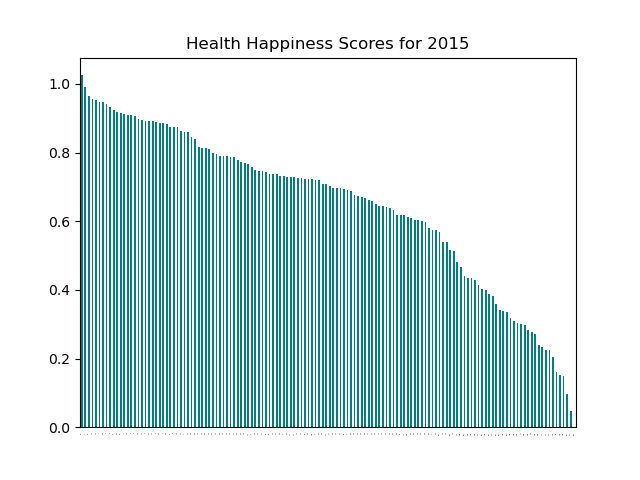

<IPython.core.display.Javascript object>


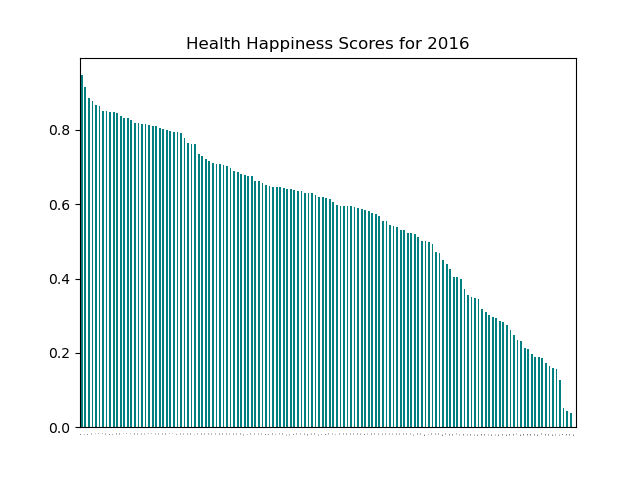

<IPython.core.display.Javascript object>


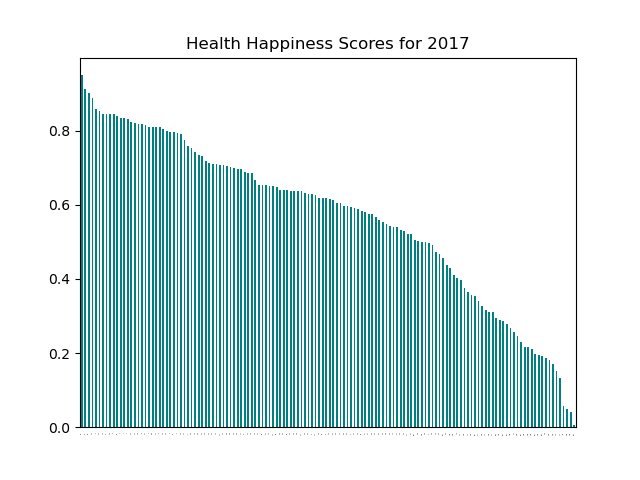

<IPython.core.display.Javascript object>


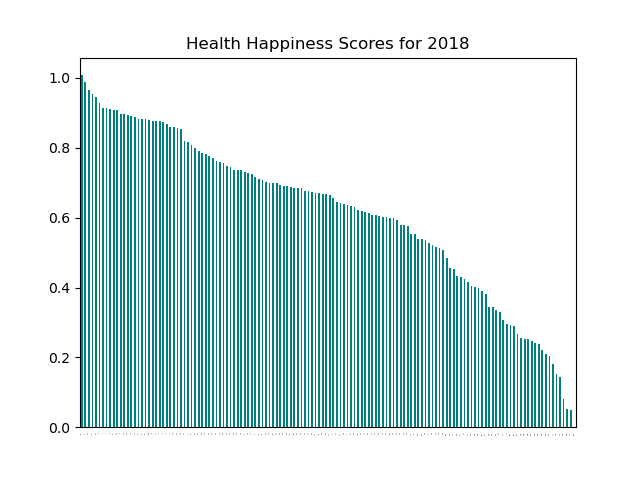

<IPython.core.display.Javascript object>


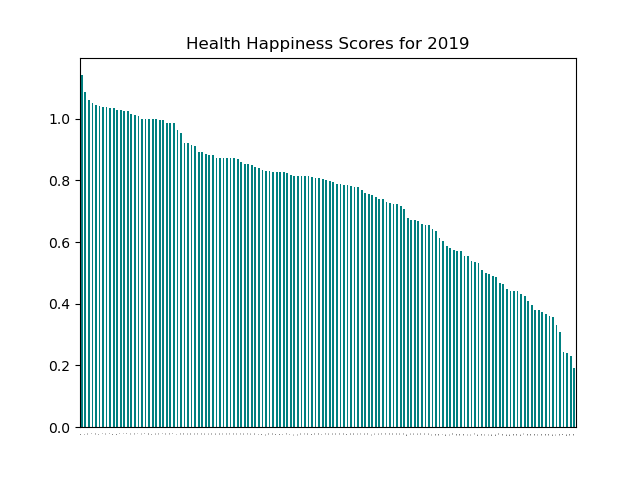

<IPython.core.display.Javascript object>


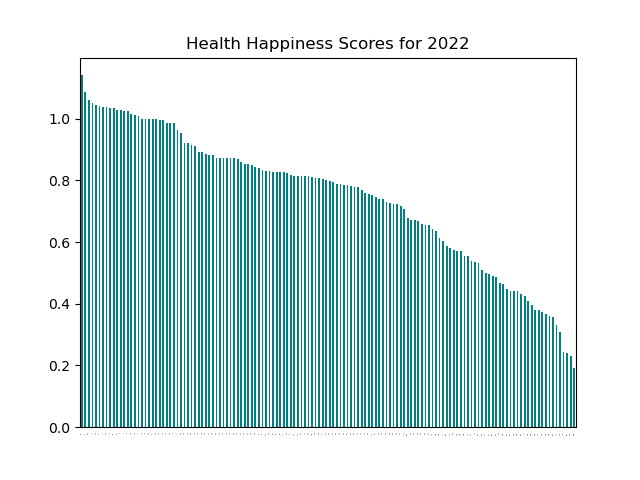

In [19]:
# loop through new DataFrames to make a bar graph of Health Happiness Scores
loop_category = categories[2]

###c = 0  # which criteria the information draws
i = 0  # location criteria test number for y values

# loop for all criteria if desired
###for category in categories:
    # restart criteria for the next year
###i = 0
for yr in year_list:

    # define loop variables
        ## for the year testing
    test_year = year_list[i]
        ## create the column for testing
    col = f'{loop_category} ({test_year})'
        ## create the DataFrame for testing
    score_df = f'{loop_category}{test_year}_df'

    # sort by the category value and create DataFrame for plotting
    health_data_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
    score_df = pd.DataFrame(health_data_df_sorted, columns = ['Country',f'{col}'])

    # create bar chart without the x axis tick marks
    score_df.plot(kind='bar',
                         color='teal',
                         legend=None,
                         title= (f'{loop_category} Happiness Scores for {test_year}')
                         )
    # simply analyzing the shape of the graph, don't need country name just yet
    plt.tick_params(axis='x', labelsize=0, length = 0)

    #plt.savefig("Images/Figure1.png")
    #plt.show()

    # and create chart for the next year
    i += 1

# next criteria to create charts if desired
###c +=1

In [20]:

# top_category = categories[0]
# test_year = year_list[1]
# top_col = f'{top_category} ({test_year})'
# # top_category
# happy_data_df_sorted = happy_data_df.sort_values(f'{top_col}', ascending=False)
# score_overall_df = pd.DataFrame(happy_data_df_sorted, columns = ['Country','Happiness Score (2016)'])
# #score_overall_df = pd.DataFrame(health_data_df_sorted, columns = ['Country',f'{top_col}'])
# score_overall_df

In [21]:
###TEST TEST TEST

loop_category = categories[2] # Health Happiness Score
top_category = categories[0]  # Overall Happiness Score

test_year = year_list[2]
    ## create the column for testing
col = f'{loop_category} ({test_year})'
    ## create the column for testing
top_col = f'{top_category} ({test_year})'    
    ## create the DataFrame for testing
# score_df = f'{loop_category}{test_year}_df'

# sort by the category value and create DataFrame for plotting
clean_data_df_sorted = clean_data_df.sort_values(f'{top_col}', ascending=False)    

# for Overall Happiness Score (x-values) and Category Scores (y_values) for the Years selected
# values for plotting
x_values = clean_data_df_sorted[f'{top_col}']
y_values = clean_data_df_sorted[f'{col}']

# statistics
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

# set up the y=mx+b detail to overlay the scatter plot
slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

slope_intercept, regress_values, slope, pvalue

('y = 0.15x +-0.26',
 3      0.897182
 2      0.894869
 1      0.892094
 0      0.890552
 5      0.886697
          ...   
 139    0.273934
 135    0.270234
 137    0.268846
 128    0.251422
 138    0.182961
 Name: Happiness Score (2017), Length: 140, dtype: float64,
 0.15419292993503275,
 3.055230693718923e-30)

<IPython.core.display.Javascript object>


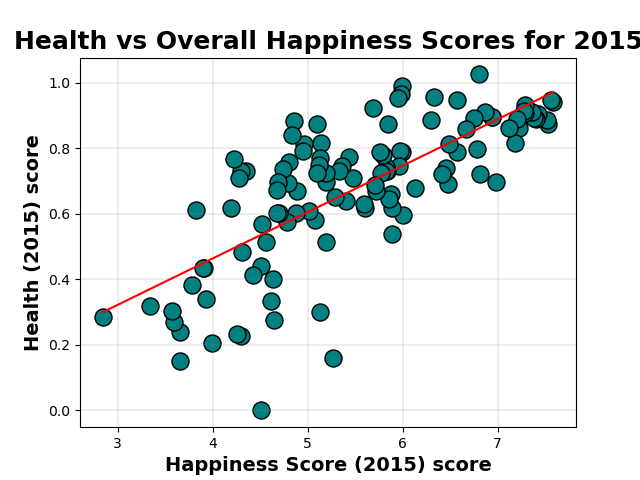

For the Happiness Survey Year 2015
The r-value is: 0.54 and the pvalue is: 0.0
The slope intercept is: slope_intercept


<IPython.core.display.Javascript object>


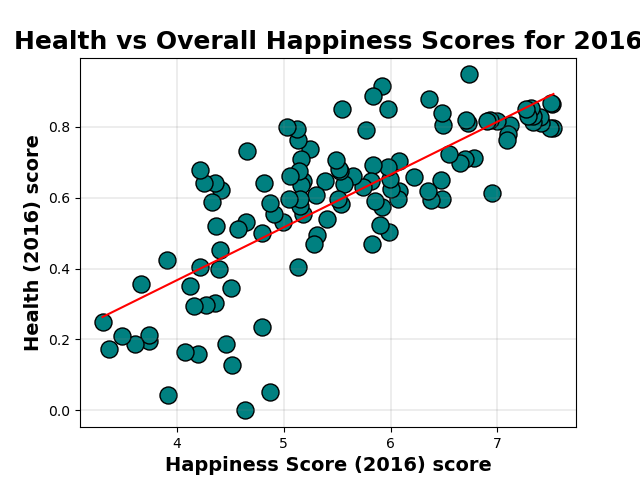

For the Happiness Survey Year 2016
The r-value is: 0.578 and the pvalue is: 0.0
The slope intercept is: slope_intercept


<IPython.core.display.Javascript object>


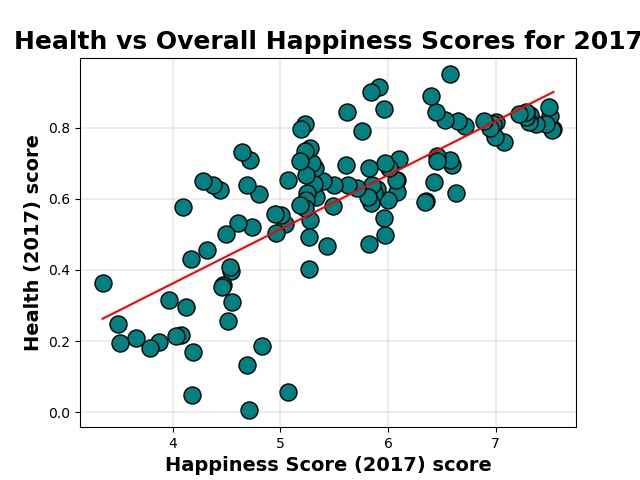

For the Happiness Survey Year 2017
The r-value is: 0.565 and the pvalue is: 0.0
The slope intercept is: slope_intercept


<IPython.core.display.Javascript object>


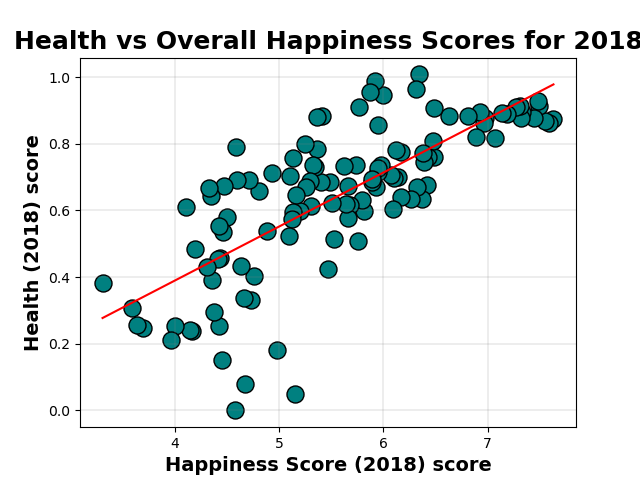

For the Happiness Survey Year 2018
The r-value is: 0.554 and the pvalue is: 0.0
The slope intercept is: slope_intercept


<IPython.core.display.Javascript object>


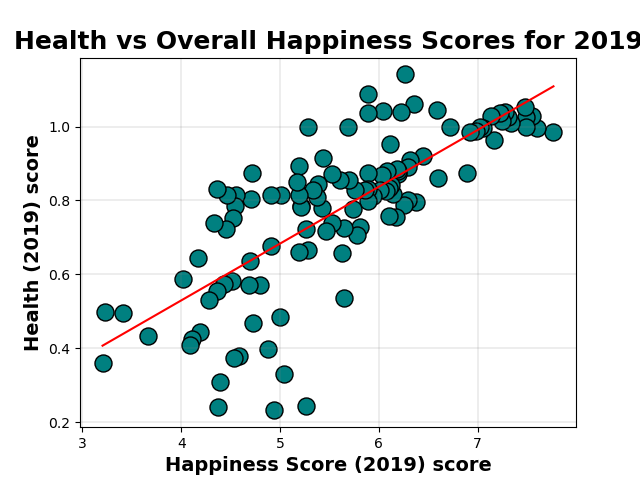

For the Happiness Survey Year 2019
The r-value is: 0.568 and the pvalue is: 0.0
The slope intercept is: slope_intercept


<IPython.core.display.Javascript object>


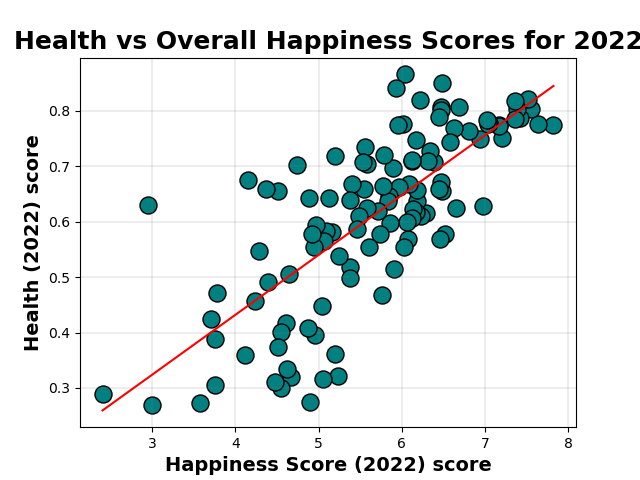

For the Happiness Survey Year 2022
The r-value is: 0.564 and the pvalue is: 0.0
The slope intercept is: slope_intercept


IndexError: list index out of range

In [65]:
# loop through new DataFrames to make a scatter plot of Health Happiness Scores

i = 0  # location criteria test number for y values

# loop for all categories if desired
for category in categories:
    c += 1  # which category the information draws, skip the first overall category
    
    loop_category = categories[2] # Health Happiness Score
    top_category = categories[0]  # Overall Happiness Score, list index of zero
    # restart categories for the next year
    for yr in year_list:
        # define loop variables
            ## for the year testing
        test_year = year_list[i]
            ## create the column for testing
        col = f'{loop_category} ({test_year})'
            ## create the column for testing
        top_col = f'{top_category} ({test_year})'

        # sort by the category value and create DataFrame for plotting
        clean_data_df_sorted = clean_data_df.sort_values(f'{top_col}', ascending=False)    

        ## for Overall Happiness Score (x-values) and Category Scores (y_values) for the Years selected
            ## values for plotting
        x_values = clean_data_df_sorted[f'{top_col}']
        y_values = clean_data_df_sorted[f'{col}']

        # statistics
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values =x_values * slope + intercept

        # set up the y=mx+b detail to overlay the scatter plot
        slope_intercept = 'y = ' + str(round(slope,3)) + 'x +' + str(round(intercept,3))  ## y = mx + b

        # plot details, add annotation, add chart features
        plt.figure()
        plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
        plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

        plt.annotate(slope_intercept, (10,10), fontsize=20, color="red")

        # set title, labels, grid, then save and present the data
        plt.title(f'Health vs Overall Happiness Scores for {test_year}', fontsize=18, weight='bold')           
        plt.xlabel(f'{top_col} score', fontsize=14, weight='bold')
        plt.ylabel(f'{col} score', fontsize=14, weight='bold')
        plt.grid(color='gray', linestyle='-', linewidth=0.2)

        # print r value and pvalue
        print(f'For the Happiness Survey Year {test_year}')
        print(f'The r-value is: {round(rvalue**2,3)} and the pvalue is: {round(pvalue**2,3)}')
        print(f'The slope intercept is: slope_intercept')

        # Save the figure
        #plt.savefig("output_data/Fig5.png")

        # present the data
        plt.show()
        # and create chart for the next year
        i += 1
# next criteria to create charts if desired
#c +=1

<IPython.core.display.Javascript object>


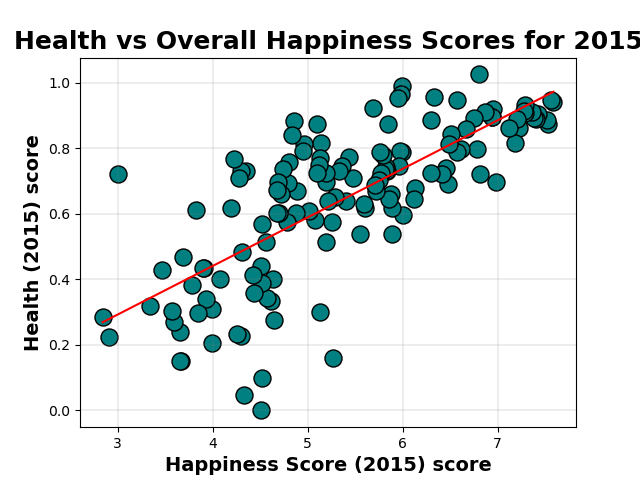

For the Happiness Survey Year 2015
The r-value is: 0.554 and the pvalue is: 0.0
The slope intercept is: y = 0.148x +-0.152


<IPython.core.display.Javascript object>


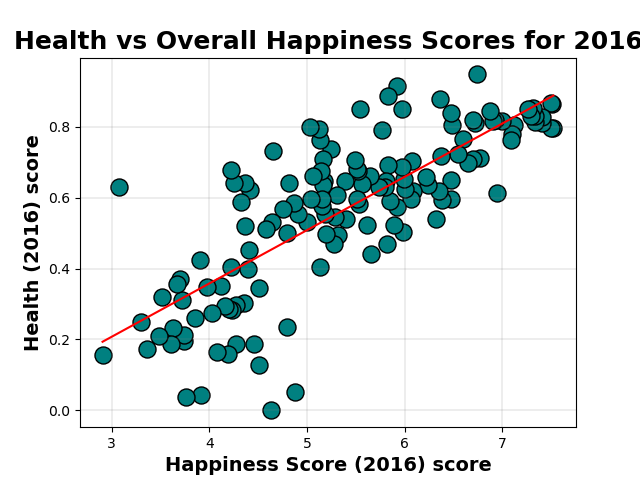

For the Happiness Survey Year 2016
The r-value is: 0.609 and the pvalue is: 0.0
The slope intercept is: y = 0.15x +-0.243


<IPython.core.display.Javascript object>


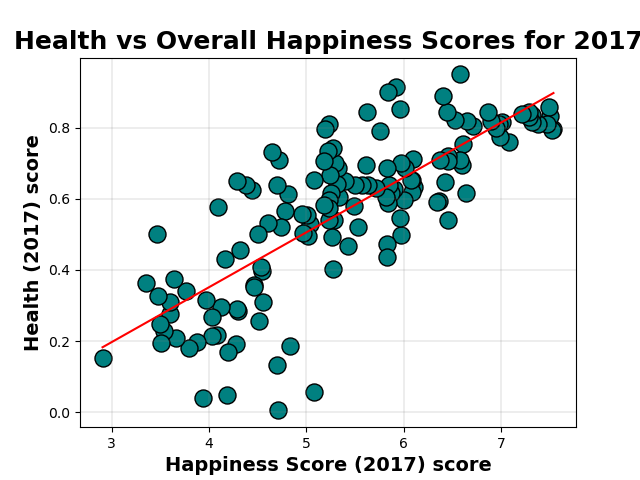

For the Happiness Survey Year 2017
The r-value is: 0.613 and the pvalue is: 0.0
The slope intercept is: y = 0.154x +-0.265


<IPython.core.display.Javascript object>


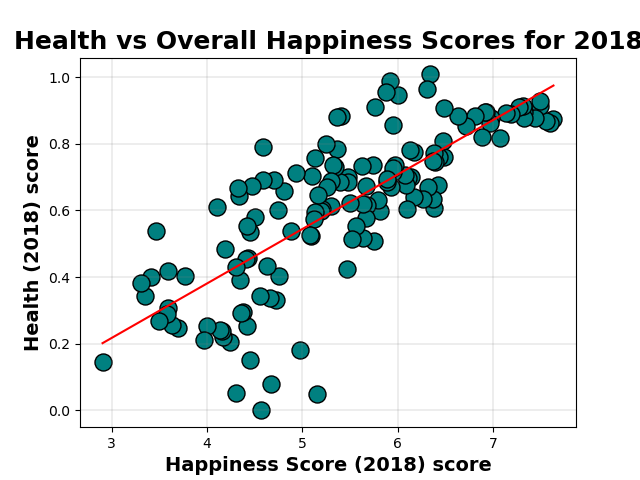

For the Happiness Survey Year 2018
The r-value is: 0.6 and the pvalue is: 0.0
The slope intercept is: y = 0.163x +-0.273


<IPython.core.display.Javascript object>


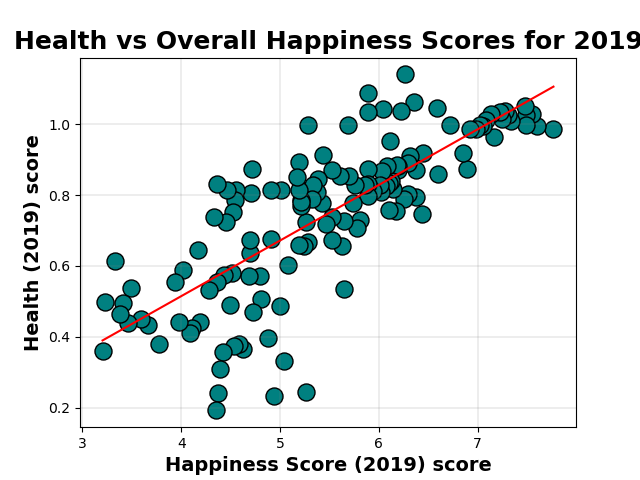

For the Happiness Survey Year 2019
The r-value is: 0.607 and the pvalue is: 0.0
The slope intercept is: y = 0.157x +-0.113


<IPython.core.display.Javascript object>


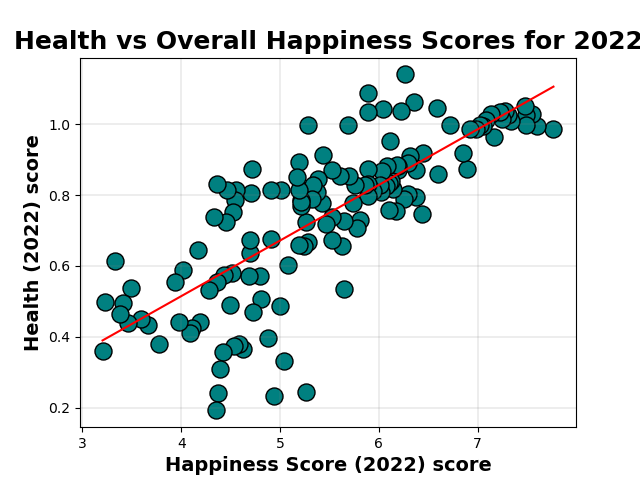

For the Happiness Survey Year 2022
The r-value is: 0.607 and the pvalue is: 0.0
The slope intercept is: y = 0.157x +-0.113


In [29]:
# THIS IS REAL NOT TEST
# define loop variables
        ## for the year testing
i = 0    
for yr in year_list:    
    
    #define variables
    test_year = year_list[i]
    ## create the column for testing
    col = f'{loop_category} ({test_year})'
    ## create the column for testing
    top_col = f'{top_category} ({test_year})' 
        
    # sort by the category value and create DataFrame for plotting
    clean_data_df_sorted = clean_data_df.sort_values(f'{top_col}', ascending=False)    
        
    # for Overall Happiness Score (x-values) and Category Scores (y_values) for the Years selected
        ## values for plotting
    x_values = clean_data_df_sorted[f'{top_col}']
    y_values = clean_data_df_sorted[f'{col}']
    
    # statistics
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values =x_values * slope + intercept
    
    # set up the y=mx+b detail to overlay the scatter plot
    slope_intercept = 'y = ' + str(round(slope,3)) + 'x +' + str(round(intercept,3))  ## y = mx + b

    # plot details, add annotation, add chart features
    plt.figure()
    plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
    plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line
    
    plt.annotate(slope_intercept, (10,10), fontsize=20, color="red")
    
    # set title, labels, grid, then save and present the data
    plt.title(f'Health vs Overall Happiness Scores for {test_year}', fontsize=18, weight='bold')           
    plt.xlabel(f'{top_col} score', fontsize=14, weight='bold')
    plt.ylabel(f'{col} score', fontsize=14, weight='bold')
    plt.grid(color='gray', linestyle='-', linewidth=0.2)

    # print r value and pvalue
    print(f'For the Happiness Survey Year {test_year}')
    print(f'The r-value is: {round(rvalue**2,3)} and the pvalue is: {round(pvalue**2,3)}')
    print(f'The slope intercept is: {slope_intercept}')
          
    # Save the figure
    #plt.savefig("output_data/Fig5.png")
    i += 1
    # present the data
    plt.show()
    # and create chart for the next year
i += 1


In [34]:
 # Select country and corresponsing Happiness Scores columns for the years
happy_data_df = pd.DataFrame(clean_data_df[['Country',
                                            'Happiness Score (2015)',
                                            'Happiness Score (2016)',
                                            'Happiness Score (2017)',
                                            'Happiness Score (2018)',
                                            'Happiness Score (2019)',
                                            'Happiness Score (2022)'
                                            ]])
# rename the country column to make it easy on the eyes
happy_data_df = happy_data_df.rename(columns={'Country.1':'Country'})
# display only the columns pertaining to health
happy_data_df

,Country,Happiness Score (2015),Happiness Score (2016),Happiness Score (2017),Happiness Score (2018),Happiness Score (2019),Happiness Score (2022)
0,0,7.587,7.509,7.494,7.487,7.480,7.480
1,1,7.561,7.501,7.504,7.495,7.494,7.494
2,2,7.527,7.526,7.522,7.555,7.600,7.600
3,3,7.522,7.498,7.537,7.594,7.554,7.554
4,4,7.427,7.404,7.316,7.328,7.278,7.278
...,...,...,...,...,...,...,...
135,135,3.465,3.515,3.471,3.408,3.334,3.334
136,136,3.340,3.484,3.657,4.141,4.883,4.883
137,137,3.006,3.069,3.462,3.462,3.462,3.462
138,138,2.905,2.905,2.905,2.905,3.775,3.775


False

In [47]:
# create DataFrame with columns for aggregate purposes (country, year, score)
agg_df = clean_data_df.groupby(['Country']).agg(['mean','median','var','std','sem'])
agg_df.dtypes

Rank (2015)        mean      float64
                   median    float64
                   var       float64
                   std       float64
                   sem       float64
                              ...   
Generosity (2022)  mean      float64
                   median    float64
                   var       float64
                   std       float64
                   sem       float64
Length: 210, dtype: object

<IPython.core.display.Javascript object>


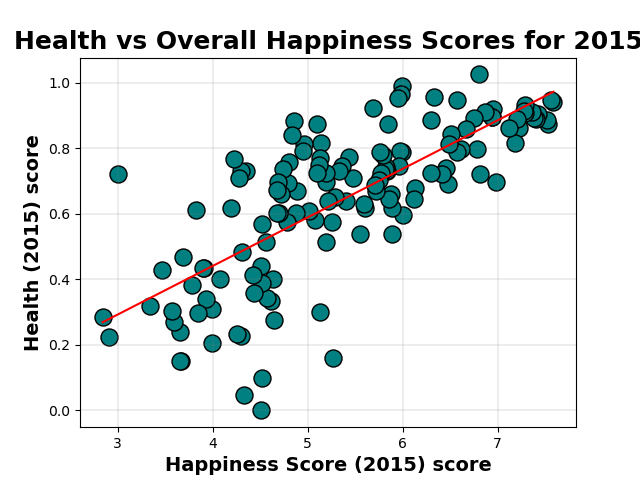

For the Happiness Survey Year 2015
The r-value is: 0.554 and the pvalue is: 0.0


In [32]:
# sort by the category value and create DataFrame for plotting for 2015
    # define loop variables
    ## for the year testing
test_year = year_list[0]
    ## create the column for testing
col = f'{loop_category} ({test_year})'
    ## create the column for testing
top_col = f'{top_category} ({test_year})' 
clean_data_df_sorted = clean_data_df.sort_values(f'{top_col}', ascending=False)    

# for Overall Happiness Score (x-values) and Category Scores (y_values) for the Years selected
    ## values for plotting
x_values = clean_data_df_sorted[f'{top_col}']
y_values = clean_data_df_sorted[f'{col}']

# statistics
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

# set up the y=mx+b detail to overlay the scatter plot
slope_intercept = 'y = ' + str(round(slope,3)) + 'x +' + str(round(intercept,3))  ## y = mx + b

# plot details, add annotation, add chart features
plt.figure()
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, (10,10), fontsize=20, color="red")

# set title, labels, grid, then save and present the data
plt.title(f'Health vs Overall Happiness Scores for {test_year}', fontsize=18, weight='bold')           
plt.xlabel(f'{top_col} score', fontsize=14, weight='bold')
plt.ylabel(f'{col} score', fontsize=14, weight='bold')
plt.grid(color='gray', linestyle='-', linewidth=0.2)


# print r value and pvalue
print(f'For the Happiness Survey Year {test_year}')
print(f'The r-value is: {round(rvalue**2,3)} and the pvalue is: {round(pvalue**2,3)}')
# print(f'The slope intercept is: {slope_intercept}')

# Save the figure
#plt.savefig("output_data/Fig5.png")

# present the data
plt.show()

In [ ]:
agg = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
agg